### create the trainval and test list for idler dataset

In [1]:
import os
from random import shuffle

In [2]:
list_files = os.listdir('/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/JPEGImages/')
shuffle(list_files)
trainval_list = list_files[:100]
test_list = list_files[100:]
# print(len(list_files), len(trainval_list), len(test_list))
# print('trainval_list:', trainval_list)
# print('test list:', test_list)

In [3]:
with open('/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/ImageSets/Main/trainval.txt', 'w') as f:
    for item in trainval_list:
        f.write("%s\n" % item[:-4])
with open('/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/ImageSets/Main/test.txt', 'w') as f:
    for item in test_list:
        f.write("%s\n" % item[:-4])

### visualize labels

In [4]:
import os
import xml.etree.ElementTree as ET
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [5]:
list_files = os.listdir('/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/Annotations/')

DJI_0001_0_34.xml
idler
idler
idler
idler
idler
idler
idler
idler
idler
idler


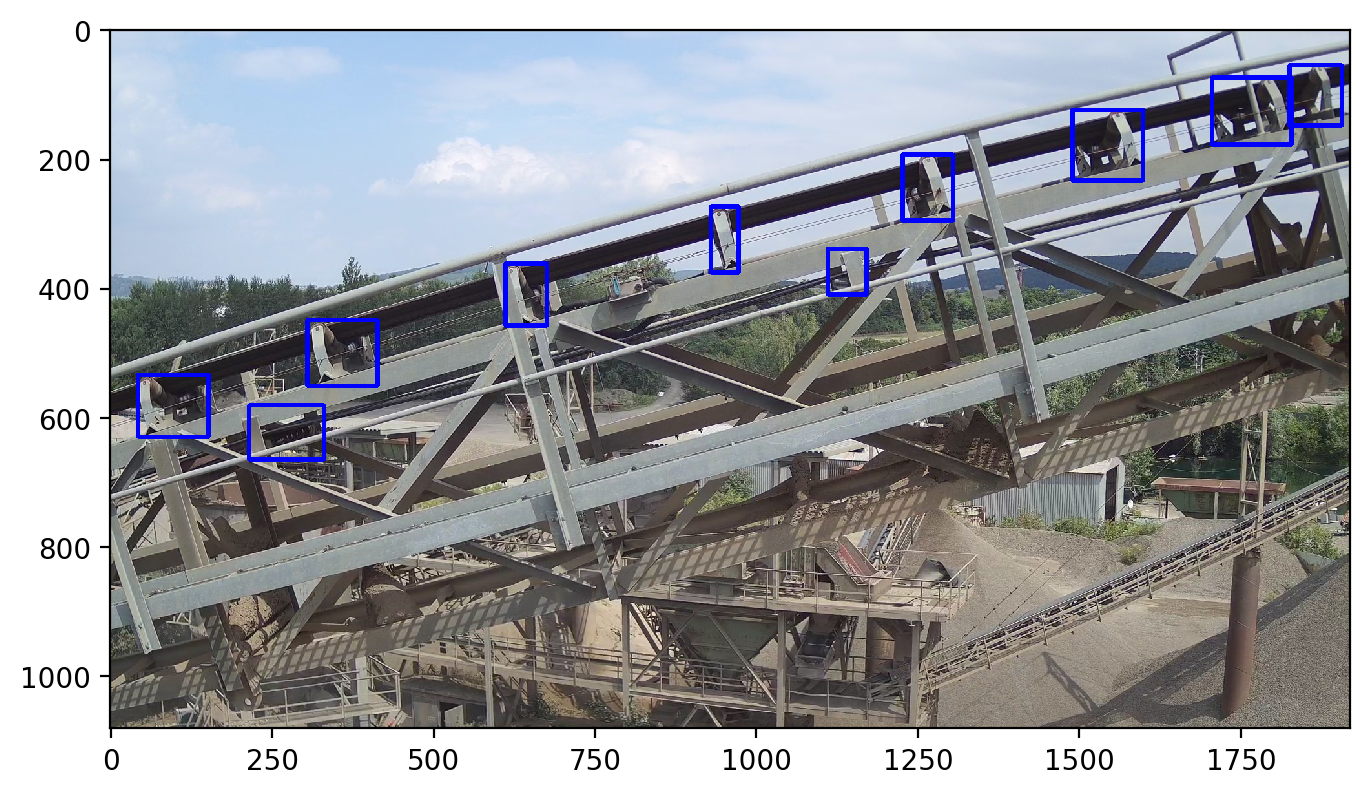

In [6]:
%matplotlib inline
for xml_file in list_files:
    print(xml_file)
    image = cv2.imread('/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/JPEGImages/' + xml_file[:-4] + '.jpg')
    root = ET.parse('/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/Annotations/' + xml_file).getroot()
    some_objects = root.findall('object')
    for bbox in some_objects:
        label = bbox[0].text
        xmin = int(bbox[4][0].text)
        ymin = int(bbox[4][1].text)
        xmax = int(bbox[4][2].text)
        ymax = int(bbox[4][3].text)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax),(255,0,0),5)
        print(label)
    figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    break

### Renaming the idlers images and editing the xml's